In [1]:
using Gadfly
using Interact

# Aggregate Production Function

$$ Y_t = A_t \cdot F(K_t, L_t) $$

## Capital

In [23]:
function F(K, L, α)
    return K^α*L^(1-α)
end;

In [26]:
function dF_dK(K, L, α)
    return α*K^(α-1)*L^(1-α)
end;

In [28]:
function d2F_dK2(K, L, α)
    return α*(α-1)*K^(α-2)*L^(1-α)
end

d2F_dK2 (generic function with 1 method)

Interact.Options{:SelectionSlider,Any}(169: "input-66" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(171: "input-67" = 50 Any , "L", 50, "50", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict{Any,Any}(Pair{Any,Any}(100, "100"),Pair{Any,Any}(50, "50"),Pair{Any,Any}(80, "80"),Pair{Any,Any}(40, "40"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(35, "35"),Pair{Any,Any}(55, "55")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(173: "input-68" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

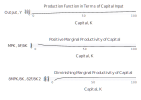

In [40]:
@manipulate for A in 1:5, L in 0:5:100, α in 0:.1:1
    K = linspace(0, 100, 1000)
    
    Y = []
    for level_K in K push!(Y, A*F(level_K, L, α)) end
    
    p1 = plot(
        layer(x=K, y=Y, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=300),
        Guide.Title("Production Function in Terms of Capital Input"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("Output, Y")
    )

    
    dY_dK = []
    for level_K in K push!(dY_dK, A*dF_dK(level_K, L, α)) end
    
    p2 = plot(
        layer(x=K, y=dY_dK, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=5),
        Guide.Title("Positive Marginal Productivity of Capital"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("MPK, δF/δK")
    )  

    
    d2Y_dK2 = []
    for level_K in K push!(d2Y_dK2, A*d2F_dK2(level_K, L, α)) end
    
    p3 = plot(
        layer(x=K, y=d2Y_dK2, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=-.5,ymax=0),
        Guide.Title("Diminishing Marginal Productivity of Capital"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("δMPK/δK, δ2F/δK2")
    )

    vstack(p1,p2,p3)
    
end

Interact.Options{:SelectionSlider,Any}(111: "input-44" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(113: "input-45" = 50 Any , "L", 50, "50", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict{Any,Any}(Pair{Any,Any}(100, "100"),Pair{Any,Any}(50, "50"),Pair{Any,Any}(80, "80"),Pair{Any,Any}(40, "40"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(35, "35"),Pair{Any,Any}(55, "55")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(115: "input-46" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

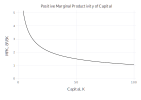

In [32]:
@manipulate for A in 1:5, L in 0:5:100, α in 0:.1:1
    K = linspace(0, 100, 1000)
    
    dY_dK = []
    for level_K in K push!(dY_dK, A*dF_dK(level_K, L, α)) end
    
    plot(
        layer(x=K, y=dY_dK, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=5),
        Guide.Title("Positive Marginal Productivity of Capital"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("MPK, δF/δK")
    )
end

Interact.Options{:SelectionSlider,Any}(119: "input-47" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(121: "input-48" = 50 Any , "L", 50, "50", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict{Any,Any}(Pair{Any,Any}(100, "100"),Pair{Any,Any}(50, "50"),Pair{Any,Any}(80, "80"),Pair{Any,Any}(40, "40"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(35, "35"),Pair{Any,Any}(55, "55")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(123: "input-49" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

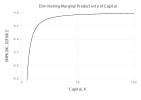

In [33]:
@manipulate for A in 1:5, L in 0:5:100, α in 0:.1:1
    K = linspace(0, 100, 1000)
    
    d2Y_dK2 = []
    for level_K in K push!(d2Y_dK2, A*d2F_dK2(level_K, L, α)) end
    
    plot(
        layer(x=K, y=d2Y_dK2, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=-.5,ymax=0),
        Guide.Title("Diminishing Marginal Productivity of Capital"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("δMPK/δK, δ2F/δK2")
    )
end

## Labor

Interact.Options{:SelectionSlider,Any}(127: "input-50" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(129: "input-51" = 50 Any , "K", 50, "50", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict{Any,Any}(Pair{Any,Any}(100, "100"),Pair{Any,Any}(50, "50"),Pair{Any,Any}(80, "80"),Pair{Any,Any}(40, "40"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(35, "35"),Pair{Any,Any}(55, "55")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(131: "input-52" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

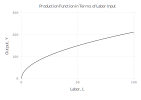

In [34]:
@manipulate for A in 1:5, K in 0:5:100, α in 0:.1:1
    L = linspace(0, 100, 1000)
    
    Y = []
    for level_L in L push!(Y, A*F(K, level_L, α)) end
    
    plot(
        layer(x=L, y=Y, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=300),
        Guide.Title("Production Function in Terms of Labor Input"),
        Guide.xlabel("Labor, L"),
        Guide.ylabel("Output, Y")
    )
end

In [25]:
function dF_dL(K, L, α)
    return (1-α)*K^α*L^(-α)
end

dF_dL (generic function with 1 method)

Interact.Options{:SelectionSlider,Any}(135: "input-53" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(137: "input-54" = 50 Any , "K", 50, "50", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict{Any,Any}(Pair{Any,Any}(100, "100"),Pair{Any,Any}(50, "50"),Pair{Any,Any}(80, "80"),Pair{Any,Any}(40, "40"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(35, "35"),Pair{Any,Any}(55, "55")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(139: "input-55" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

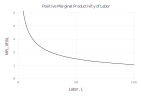

In [35]:
@manipulate for A in 1:5, K in 0:5:100, α in 0:.1:1
    L = linspace(0, 100, 1000)
    
    dY_dL = []
    for level_L in L push!(dY_dL, A*dF_dL(K, level_L, α)) end
    
    plot(
        layer(x=L, y=dY_dL, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=5),
        Guide.Title("Positive Marginal Productivity of Labor"),
        Guide.xlabel("Labor, L"),
        Guide.ylabel("MPL, δF/δL")
    )
end

In [29]:
function d2F_dL2(K, L, α)
    return -α*(1-α)*K^α*L^(-α-1)
end

d2F_dL2 (generic function with 1 method)

Interact.Options{:SelectionSlider,Any}(143: "input-56" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(145: "input-57" = 50 Any , "K", 50, "50", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict{Any,Any}(Pair{Any,Any}(100, "100"),Pair{Any,Any}(50, "50"),Pair{Any,Any}(80, "80"),Pair{Any,Any}(40, "40"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(35, "35"),Pair{Any,Any}(55, "55")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(147: "input-58" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

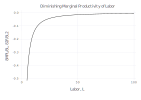

In [36]:
@manipulate for A in 1:5, K in 0:5:100, α in 0:.1:1
    L = linspace(0, 100, 1000)
    
    d2Y_dL2 = []
    for level_L in L push!(d2Y_dL2, A*d2F_dL2(K, level_L, α)) end
    
    plot(
        layer(x=L, y=d2Y_dL2, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=-.5,ymax=0),
        Guide.Title("Diminishing Marginal Productivity of Labor"),
        Guide.xlabel("Labor, L"),
        Guide.ylabel("δMPL/δL, δ2F/δL2")
    )
end

<br>

# Aggregate Per Worker Production Function

$$ y_t = A_t \cdot f(k_t) $$

In [30]:
function f(k, α)
    return k^α
end

f (generic function with 1 method)

Interact.Options{:SelectionSlider,Any}(151: "input-59" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(153: "input-60" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

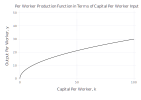

In [37]:
@manipulate for A in 1:5, α in 0:.1:1
    k = linspace(0, 100, 1000)
    
    y = []
    for level_k in k push!(y, A*f(level_k, α)) end
    
    plot(
        layer(x=k, y=y, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=50),
        Guide.Title("Per Worker Production Function in Terms of Capital Per Worker Input"),
        Guide.xlabel("Capital Per Worker, k"),
        Guide.ylabel("Output Per Worker, y")
    )
end

In [38]:
@manipulate for A in 1:5, α in 0:.1:1
    k = linspace(0, 100, 1000)
    
    dY_dk = []
    for level_K in K push!(dY_dK, A*dF_dK(level_K, L, α)) end
    
    plot(
        layer(x=K, y=dY_dK, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=5),
        Guide.Title("Positive Marginal Productivity of Capital"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("MPK, δF/δK")
    )
end

Interact.Options{:SelectionSlider,Any}(157: "input-61" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(159: "input-62" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

LoadError: [91mUndefVarError: K not defined[39m

Interact.Options{:SelectionSlider,Any}(161: "input-63" = 3 Any , "A", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(163: "input-64" = 50 Any , "L", 50, "50", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"5"=>5,"10"=>10,"15"=>15,"20"=>20,"25"=>25,"30"=>30,"35"=>35,"40"=>40,"45"=>45…), Dict{Any,Any}(Pair{Any,Any}(100, "100"),Pair{Any,Any}(50, "50"),Pair{Any,Any}(80, "80"),Pair{Any,Any}(40, "40"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(35, "35"),Pair{Any,Any}(55, "55")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(165: "input-65" = 0.5 Any , "α", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

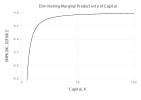

In [39]:
@manipulate for A in 1:5, L in 0:5:100, α in 0:.1:1
    K = linspace(0, 100, 1000)
    
    d2Y_dK2 = []
    for level_K in K push!(d2Y_dK2, A*d2F_dK2(level_K, L, α)) end
    
    plot(
        layer(x=K, y=d2Y_dK2, Geom.line, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=-.5,ymax=0),
        Guide.Title("Diminishing Marginal Productivity of Capital"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("δMPK/δK, δ2F/δK2")
    )
end